I saw a post about the effect President Trump has had on the economy:

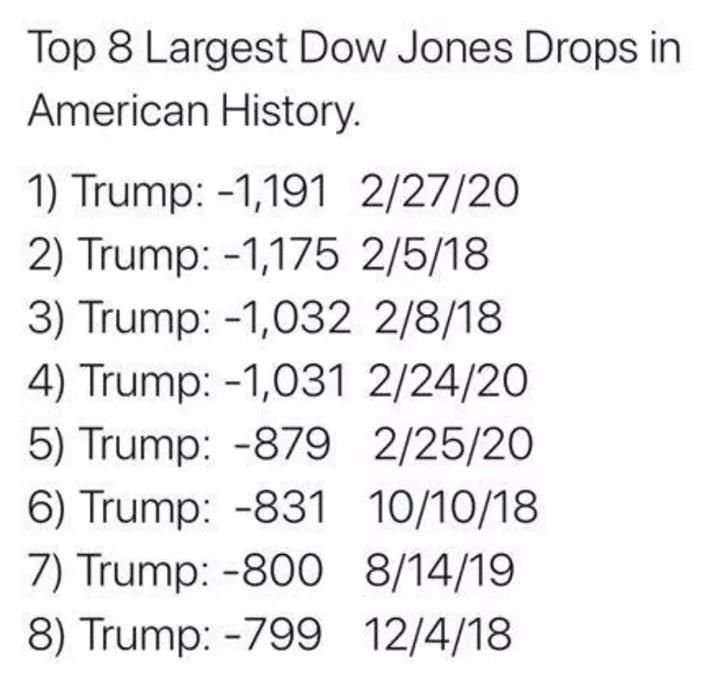

I got curious, so I went and got daily Dow Jones prices from [Yahoo! Finance](https://web.archive.org/save/https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1583280000&interval=1d&filter=history&frequency=1d) and decided to have a look (**starting in January 29, 1985**, as that was the data I could quickly find freely available).

First, let's take a look at the data.

In [56]:
# data from Yahoo! Finance
data = read.csv("DJI.csv")
head(data)

Date,Open,High,Low,Close,Adj.Close,Volume
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985-01-29,1277.72,1295.49,1266.89,1292.62,1292.62,13560000
1985-01-30,1297.37,1305.10,1278.93,1287.88,1287.88,16820000
1985-01-31,1283.24,1293.40,1272.64,1286.77,1286.77,14070000
1985-02-01,1276.94,1286.11,1269.77,1277.72,1277.72,10980000
1985-02-04,1272.08,1294.94,1268.99,1290.08,1290.08,11630000
1985-02-05,1294.06,1301.13,1278.60,1285.23,1285.23,13800000


So, what we see is the date and a few different statistics about the price throughout the day. 

From Yahoo!: \*Close price adjusted for splits. \*\*Adjusted close price adjusted for both dividends and splits.

I decided to go with closing price as that seemed most plausible although I'd imagine we'd get similar stories in any case.

Let's look at the original post: what are the eight days with the biggest loss on the Dow Jones?

In [57]:
# Look at one-day differences
oneDayCloseDiff = diff(data$Close)
# Determine where the large jumps were
idxs = order(oneDayCloseDiff)

data.frame(date=data$Date[idxs[1:8] + 1], diff=oneDayCloseDiff[idxs[1:8]])

date,diff
<fct>,<dbl>
2020-02-27,-1190.9492
2018-02-05,-1175.2109
2018-02-08,-1032.8887
2020-02-24,-1031.6094
2020-02-25,-879.4414
2018-10-10,-831.8301
2019-08-14,-800.4902
2018-12-04,-799.3594


And we recover the same days! I attribute differences in exact value mostly to rounding, although mabye they used a different daily price statistic like the high point of the day. Close enough for me though.

But is that the full story? Let's visualize the closing price over time.

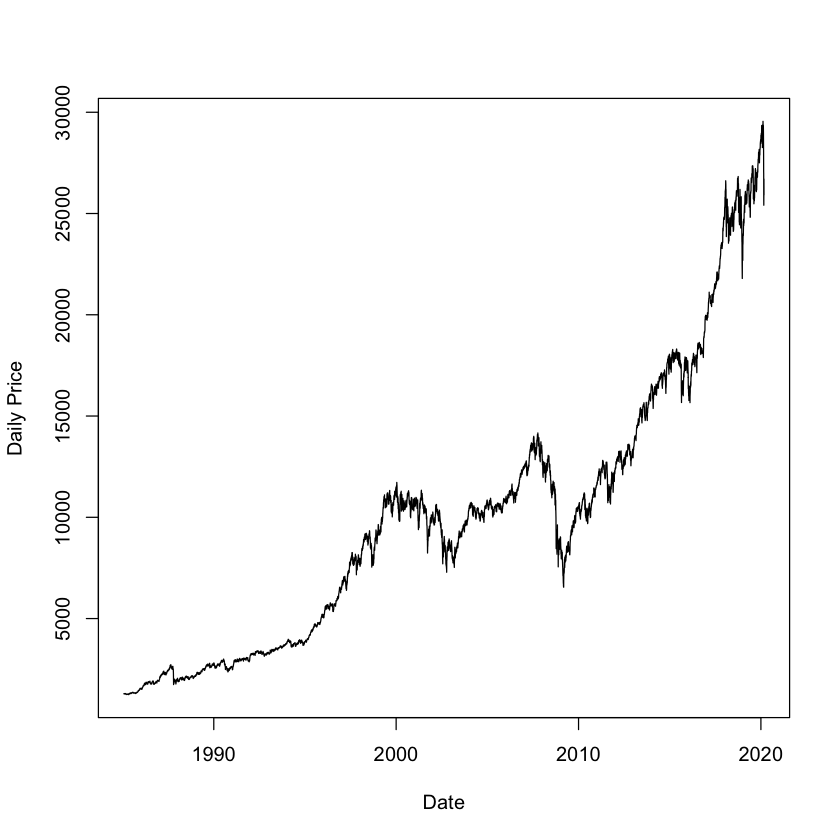

In [51]:
plot(as.Date(data$Date), data$Close, type='l', xlab="Date", ylab="Daily Price")

Thus we see the typical up-and-to-the-right vaguely-exponential curve we'd expect long-term on the stock market. But something interesting happens if we instead visualize the differences, rather than the price on its own:

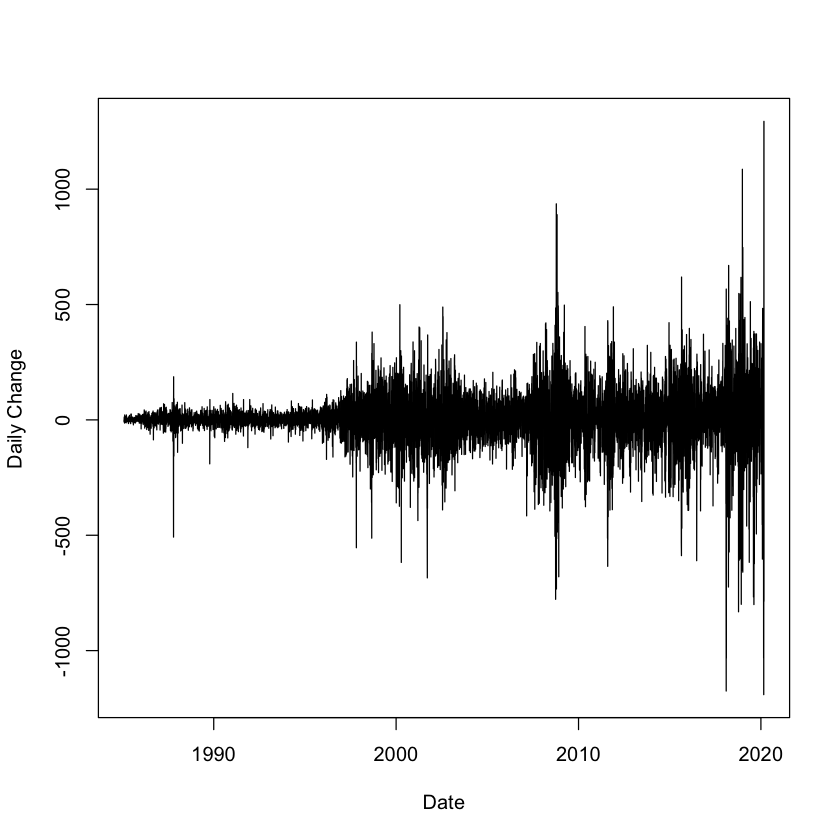

In [50]:
plot(as.Date(data$Date[2:length(data$Date)]), oneDayCloseDiff, type='l', xlab="Date", ylab="Daily Change")

Interesting! What I see there is a tendency for larger differences over time. And in fact, we can see something even more interesting if we instead look at the *percent difference* rather than the absolute difference:

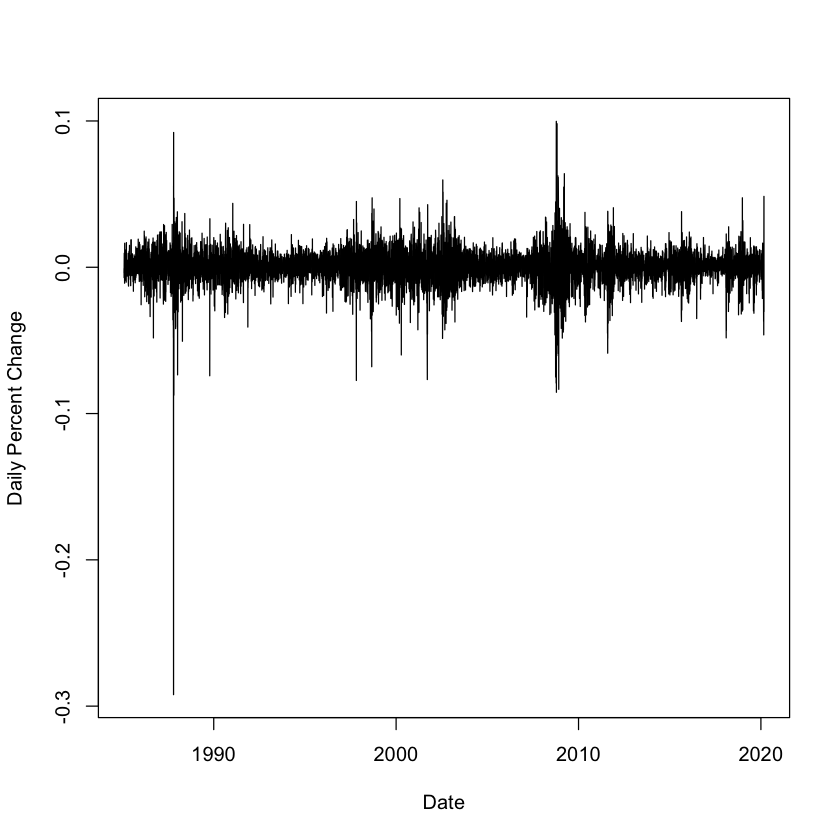

In [49]:
oneDayClosePercentDiff = diff(data$Close) / data$Close[2:length(data$Close)]
plot(as.Date(data$Date[2:length(data$Date)]), oneDayClosePercentDiff, type='l', xlab="Date", ylab="Daily Percent Change")

So, save for a few times of marked volatility, I see mostly that the percent change roughly behaves the same all the time. What I don't see is that the percent change seems to have varied all that much in the past few years relative to other points in history.

In particular, we can look at the party in charge by color:

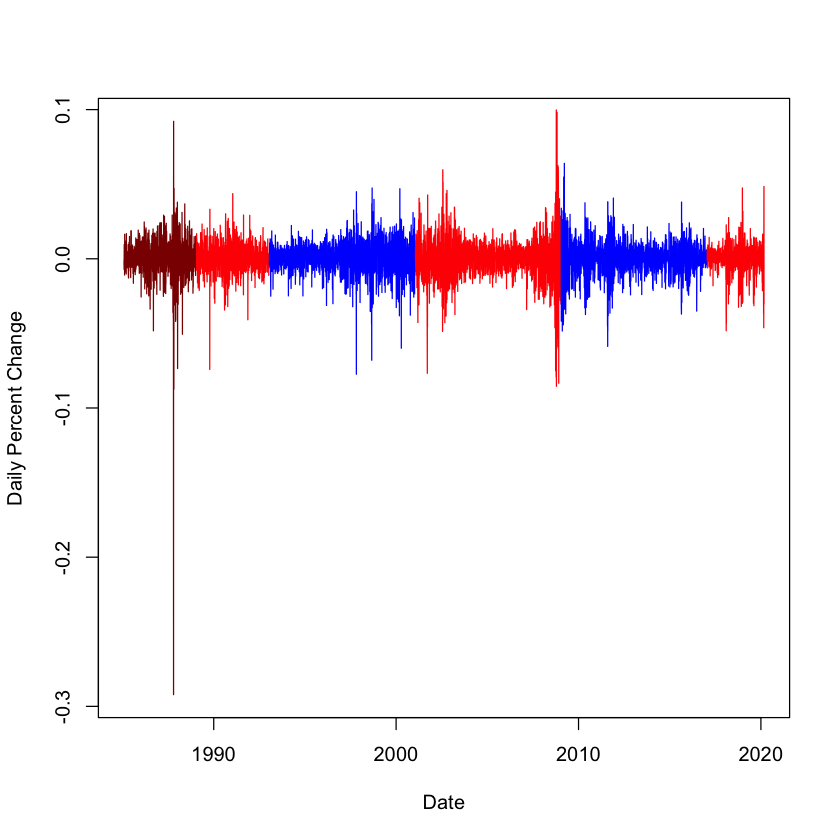

In [52]:
# First, let's build up the appropriate ranges
d = as.Date(data$Date[2:length(data$Date)])
reagan = (d >= as.Date('1981-01-20')) & (d < as.Date('1989-01-20'))
hwbush = (d >= as.Date('1989-01-20')) & (d < as.Date('1993-01-20'))
clinton = (d >= as.Date('1993-01-20')) & (d < as.Date('2001-01-20'))
wbush = (d >= as.Date('2001-01-20')) & (d < as.Date('2009-01-20'))
obama = (d >= as.Date('2009-01-20')) & (d < as.Date('2017-01-20'))
trump = d >= as.Date('2017-01-20')

# Make Reagan dark red just to delineate the change of command
plot(d[reagan], oneDayClosePercentDiff[reagan], type='l', col='darkred', xlim=c(d[1], d[length(d)]), xlab="Date", ylab="Daily Percent Change")
lines(d[hwbush], oneDayClosePercentDiff[hwbush], type='l', col='red')
lines(d[clinton], oneDayClosePercentDiff[clinton], type='l', col='blue')
lines(d[wbush], oneDayClosePercentDiff[wbush], type='l', col='red')
lines(d[obama], oneDayClosePercentDiff[obama], type='l', col='blue')
lines(d[trump], oneDayClosePercentDiff[trump], type='l', col='red')


And now I think we're ready to come full circle and answer some questions that I think are just as relevant as "which days were the single biggest drops?":

* Which days were the single highest increases?
* Which days were the single highest percent decreases?
* Which days were the single highest percent increases?

In [53]:
# Single highest increases
idxs = order(oneDayCloseDiff, decreasing = TRUE)
data.frame(date=data$Date[idxs[1:8]], diff=oneDayCloseDiff[idxs[1:8]])

date,diff
<fct>,<dbl>
2020-02-28,1293.9609
2018-12-24,1086.2500
2008-10-10,936.4199
2008-10-27,889.3501
2019-01-03,746.9395
2018-03-23,669.4004
2015-08-25,619.0693
2018-11-27,617.6992


So for the biggest increases, keeping with the meme's "top 8" method, we have:
* Trump
* Trump
* W. Bush
* W. Bush
* Trump
* Trump
* Obama
* Trump

In [54]:
# Worst percent difference
idxs = order(oneDayClosePercentDiff)
data.frame(date=data$Date[idxs[1:8]], diff=oneDayClosePercentDiff[idxs[1:8]])

date,diff
<fct>,<dbl>
1987-10-16,-0.29215984
1987-10-23,-0.08742256
2008-10-14,-0.08546138
2008-11-28,-0.08343879
2008-10-08,-0.07913441
1997-10-24,-0.07738922
2001-09-10,-0.07676635
2008-09-26,-0.07502614


And now for worst days by percentage, we have:
* Reagan
* Reagan
* W. Bush
* W. Bush
* W. Bush
* Clinton
* W. Bush
* W. Bush

In [55]:
# Best percent difference
idxs = order(oneDayClosePercentDiff, decreasing = TRUE)
data.frame(date=data$Date[idxs[1:8]], diff=oneDayClosePercentDiff[idxs[1:8]])

date,diff
<fct>,<dbl>
2008-10-10,0.09975062
2008-10-27,0.09810682
1987-10-20,0.09213698
2009-03-20,0.06397749
2008-11-12,0.06254377
2008-11-20,0.06140990
2002-07-23,0.05969148
1987-10-19,0.05555104


And finally the best days by percentage:
* W. Bush
* W. Bush
* Reagan
* Obama
* W. Bush
* W. Bush
* W. Bush
* Reagan